# Практическая работа - Теория вероятностей и статистический вывод

---

## Введение

Эта практическая работа предназначена для закрепления теоретических знаний, полученных на лекции по теории вероятностей и статистическому выводу. Ноутбук разбит на секции, соответствующие темам лекции.

### Цели работы:

- Научиться применять теоретические концепции на практике
- Освоить основные инструменты для статистического анализа в Python
- Развить интуитивное понимание ключевых теорем и методов
- Научиться корректно интерпретировать полученные результаты

### Инструкции:

1. Внимательно читайте условия задач — в них содержатся все необходимые данные
2. Для теоретических задач пишите ответы в ячейках Markdown
3. Для практических задач пишите код в ячейках Code
4. Не забывайте комментировать свой код
5. После получения численных результатов делайте выводы

**Начните с выполнения следующей ячейки для импорта библиотек:**

In [1]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(style="whitegrid")

# Для воспроизводимости результатов
np.random.seed(42)

print("Библиотеки успешно загружены!")

Библиотеки успешно загружены!


---

## Секция 1: Вероятностное пространство и условная вероятность

В этой секции вы будете работать с основными понятиями теории вероятностей: вероятностным пространством, условной вероятностью и теоремой Байеса.

### Задание 1.1: Описание вероятностного пространства (Теория)

**Условие:**

Рассмотрим эксперимент, в котором одновременно подбрасываются две честные шестигранные игральные кости (на каждой грани числа от 1 до 6). Результат эксперимента — упорядоченная пара чисел (результат первой кости, результат второй кости).

**Задание:**

Опишите вероятностное пространство для этого эксперимента, ответив на следующие вопросы:

1. Что является **элементарным исходом** в этом эксперименте? Приведите 3 примера элементарных исходов.

2. Что является **пространством элементарных исходов** $\Omega$? Опишите его словами и приведите математическую запись.

3. Какова **мощность** (количество элементов) пространства $\Omega$? Обоснуйте свой ответ.

4. Рассмотрим событие $A$ = "сумма очков на двух костях равна 7". Перечислите все элементарные исходы, входящие в это событие.

5. Вычислите вероятность события $A$: $\mathbb{P}(A) = ?$

6. Рассмотрим событие $B$ = "на первой кости выпало 3". Вычислите условную вероятность $\mathbb{P}(A|B)$ — вероятность того, что сумма равна 7, при условии что на первой кости выпало 3.

**Напишите ваши ответы в ячейке ниже:**

**Ваши ответы:**

1. **Элементарный исход:** Упорядоченная пара чисел (i, j), где i — результат броска первой кости, j — результат броска второй кости, i, j ∈ {1, 2, 3, 4, 5, 6}. Пример: (3, 5) — на первой кости выпало 3, на второй 5.

2. **Пространство Ω:** Множество всех возможных упорядоченных пар результатов:
   Ω = {(i, j) | i ∈ {1, 2, 3, 4, 5, 6}, j ∈ {1, 2, 3, 4, 5, 6}}

3. **Мощность |Ω|:** 6 × 6 = 36. Каждая кость имеет 6 возможных исходов, и поскольку кости независимы, общее число исходов равно произведению.

4. **Событие A (сумма равна 7):** 
   A = {(1,6), (2,5), (3,4), (4,3), (5,2), (6,1)}

5. **Вероятность P(A):** 
   P(A) = |A| / |Ω| = 6/36 = 1/6 ≈ 0.1667

6. **Условная вероятность P(A|B) (сумма 7 при условии, что на первой кости выпало 3):**
   B = {(3,1), (3,2), (3,3), (3,4), (3,5), (3,6)}
   A∩B = {(3,4)} (единственный исход, где сумма 7 и первая кость 3)
   P(A|B) = P(A∩B) / P(B) = (1/36) / (6/36) = 1/6 ≈ 0.1667

### Задание 1.2: Симуляция подбрасываний монеты (Практика)

**Условие:**

Честная монета имеет две стороны: решка (обозначим 0) и орёл (обозначим 1). Теоретическая вероятность выпадения орла равна $p = 0.5$.

**Задание:**

1. С помощью функции `np.random.randint(0, 2, size=n)` сгенерируйте выборку из **100 000** подбрасываний честной монеты.

2. Вычислите **эмпирическую вероятность** выпадения орла (среднее значение выборки).

3. Сравните эмпирическую вероятность с теоретической (0.5) и выведите разницу.

4. **Бонус:** Постройте график, показывающий, как накопленное среднее (cumulative mean) сходится к теоретической вероятности по мере увеличения числа подбрасываний. Это иллюстрация **Закона больших чисел**.

**Подсказки:**
- Для вычисления среднего используйте `np.mean()`
- Для накопленного среднего: `np.cumsum(data) / np.arange(1, len(data) + 1)`
- Для построения графика используйте `plt.plot()` и `plt.axhline()`

Эмпирическая вероятность: 0.500630
Теоретическая вероятность: 0.500000
Разница: 0.000630


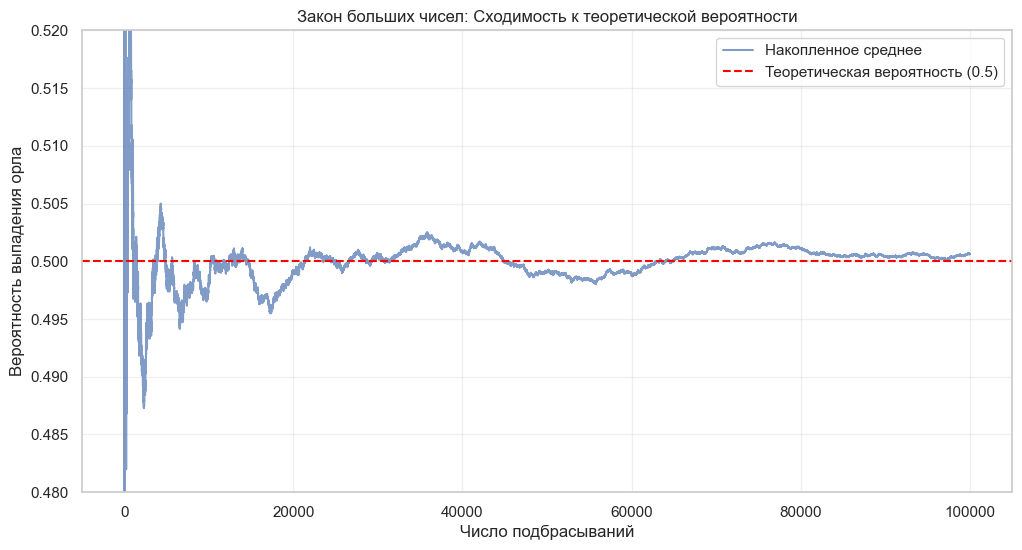

In [2]:
# Ваше решение здесь
# Генерация выборки из 100000 подбрасываний
n = 100000
coin_tosses = np.random.randint(0, 2, size=n)

# Эмпирическая вероятность выпадения орла (1)
empirical_prob = np.mean(coin_tosses)
theoretical_prob = 0.5
difference = empirical_prob - theoretical_prob

print(f"Эмпирическая вероятность: {empirical_prob:.6f}")
print(f"Теоретическая вероятность: {theoretical_prob:.6f}")
print(f"Разница: {difference:.6f}")

# Визуализация сходимости накопленного среднего
cumulative_mean = np.cumsum(coin_tosses) / np.arange(1, n+1)

plt.figure(figsize=(12, 6))
plt.plot(cumulative_mean, label='Накопленное среднее', alpha=0.7)
plt.axhline(y=0.5, color='red', linestyle='--', label='Теоретическая вероятность (0.5)')
plt.xlabel('Число подбрасываний')
plt.ylabel('Вероятность выпадения орла')
plt.title('Закон больших чисел: Сходимость к теоретической вероятности')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0.48, 0.52)
plt.show()

### Задание 1.3: Теорема Байеса в медицинской диагностике (Теория + Практика)

**Условие:**

Редкое заболевание встречается у **0.5%** населения (т.е. вероятность того, что случайный человек болен, равна 0.005).

Для диагностики этого заболевания разработан тест со следующими характеристиками:
- **Чувствительность** (sensitivity): 99% — вероятность положительного результата теста у больного человека: $\mathbb{P}(T^+|D) = 0.99$
- **Специфичность** (specificity): 98% — вероятность отрицательного результата теста у здорового человека: $\mathbb{P}(T^-|D^c) = 0.98$

Пациент прошёл тест и получил **положительный результат**.

**Вопрос:** Какова вероятность того, что пациент действительно болен?

**Задание:**

**Часть А (Теория):** Решите задачу аналитически, используя теорему Байеса.

1. Обозначьте события:
   - $D$ — человек болен
   - $T^+$ — тест положительный

2. Выпишите все известные вероятности:
   - $\mathbb{P}(D) = ?$
   - $\mathbb{P}(T^+|D) = ?$
   - $\mathbb{P}(T^+|D^c) = ?$ (выразите через специфичность)

3. Запишите формулу Байеса для $\mathbb{P}(D|T^+)$

4. Вычислите $\mathbb{P}(T^+)$ по формуле полной вероятности

5. Вычислите итоговый ответ: $\mathbb{P}(D|T^+) = ?$

**Часть Б (Практика):** Напишите код на Python для проверки ваших вычислений.

**Часть В (Интерпретация):** Объясните полученный результат. Почему вероятность болезни при положительном тесте может быть неожиданно низкой?

**Часть А: Аналитическое решение**

1. **Обозначения событий:**
   - D: человек болен
   - T⁺: тест положительный
   - Dᶜ: человек здоров

2. **Известные вероятности:**
   - P(D) = 0.005
   - P(T⁺|D) = 0.99 (чувствительность)
   - P(T⁻|Dᶜ) = 0.98 (специфичность)
   - P(T⁺|Dᶜ) = 1 - 0.98 = 0.02 (вероятность ложноположительного результата)

3. **Формула Байеса:**
   P(D|T⁺) = P(T⁺|D) * P(D) / P(T⁺)

4. **Вероятность положительного теста (формула полной вероятности):**
   P(T⁺) = P(T⁺|D) * P(D) + P(T⁺|Dᶜ) * P(Dᶜ)
   = 0.99 * 0.005 + 0.02 * 0.995

5. **Расчет:**
   P(T⁺) = 0.99 * 0.005 + 0.02 * 0.995 = 0.00495 + 0.0199 = 0.02485
   P(D|T⁺) = 0.99 * 0.005 / 0.02485 ≈ 0.1992

**Ответ:** P(D|T⁺) ≈ 19.92%

In [3]:
# Часть Б: Вычисления на Python
# Известные вероятности
P_D = 0.005  # вероятность болезни
P_Tplus_given_D = 0.99  # чувствительность
P_Tminus_given_Dc = 0.98  # специфичность
P_Dc = 1 - P_D  # вероятность быть здоровым

# Вероятность ложноположительного результата
P_Tplus_given_Dc = 1 - P_Tminus_given_Dc

# Полная вероятность положительного теста
P_Tplus = P_Tplus_given_D * P_D + P_Tplus_given_Dc * P_Dc

# Вероятность болезни при положительном тесте (Байес)
P_D_given_Tplus = (P_Tplus_given_D * P_D) / P_Tplus

print(f"Вероятность болезни в популяции: {P_D*100:.2f}%")
print(f"Вероятность положительного теста: {P_Tplus*100:.2f}%")
print(f"Вероятность болезни при положительном тесте: {P_D_given_Tplus*100:.2f}%")
print(f"Ответ: {P_D_given_Tplus*100:.1f}%")

Вероятность болезни в популяции: 0.50%
Вероятность положительного теста: 2.49%
Вероятность болезни при положительном тесте: 19.92%
Ответ: 19.9%


**Часть В: Интерпретация**

При высокой точности (99%/98%) положительный результат с вероятностью около 80% является ложным. Это происходит из-за низкой распространённости болезни (0,5%). Среди миллионов здоровых людей 2% с ложноположительным результатом численно «затмевают» редкие истинно положительные случаи у больных.

---

## Секция 2: Случайные величины и распределения

В этой секции вы будете работать с дискретными и непрерывными случайными величинами, вычислять их характеристики и работать с распределениями.

### Задание 2.1: Лотерея — расчёт математического ожидания и дисперсии (Теория)

**Условие:**

В лотерее продаётся **100 билетов** по цене **100 рублей** каждый. Призовой фонд распределён следующим образом:
- **1 билет** выигрывает главный приз: **5000 рублей**
- **5 билетов** выигрывают по **1000 рублей**
- **10 билетов** выигрывают по **100 рублей**
- Остальные **84 билета** — невыигрышные (выигрыш 0 рублей)

Пусть случайная величина $X$ — это сумма выигрыша для одного купленного билета (без вычета стоимости билета).

**Задание:**

1. Составьте **закон распределения** для случайной величины $X$ в виде таблицы:

| Значение $x_i$ | 0 | 100 | 1000 | 5000 |
|---|---|---|---|---|
| Вероятность $p_i$ | ? | ? | ? | ? |

2. Вычислите **математическое ожидание** выигрыша: $\mathbb{E}[X] = \sum x_i \cdot p_i$

3. Определите, является ли лотерея **справедливой** для игрока. Лотерея считается справедливой, если математическое ожидание выигрыша равно цене билета (100 рублей). Если $\mathbb{E}[X] > 100$, лотерея выгодна игроку; если $\mathbb{E}[X] < 100$, выгодна организатору.

4. Вычислите **дисперсию** выигрыша: $\text{Var}(X) = \mathbb{E}[X^2] - (\mathbb{E}[X])^2$
   - Сначала найдите $\mathbb{E}[X^2] = \sum x_i^2 \cdot p_i$
   - Затем вычислите дисперсию

5. Найдите **стандартное отклонение**: $\sigma = \sqrt{\text{Var}(X)}$

6. Интерпретируйте результаты: что означают полученные значения математического ожидания и дисперсии для игрока?

**Ваше решение:**

1. **Закон распределения:**

| xᵢ | 0 | 100 | 1000 | 5000 |
|-----|-----|------|-------|-------|
| pᵢ | 84/100 | 10/100 | 5/100 | 1/100 |

2. **Математическое ожидание:**
   E[X] = 0 * 0.84 + 100 * 0.10 + 1000 * 0.05 + 5000 * 0.01
        = 0 + 10 + 50 + 50 = 110 рублей

3. **Справедливость лотереи:**
   Стоимость билета: 100 рублей
   E[X] = 110 рублей > 100 рублей
   **Вывод:** Лотерея выгодна для игрока.

4. **Дисперсия:**
   E[X²] = 0² * 0.84 + 100² * 0.10 + 1000² * 0.05 + 5000² * 0.01
         = 0 + 10000 * 0.10 + 1000000 * 0.05 + 25000000 * 0.01
         = 1000 + 50000 + 250000 = 301000
   Var(X) = E[X²] - (E[X])² = 301000 - 110² = 301000 - 12100 = 288900

5. **Стандартное отклонение:**
   σ = √Var(X) = √288900 ≈ 537.5 рублей

6. **Интерпретация:**
   - Средний выигрыш составляет 110 рублей при стоимости билета 100 рублей, что делает лотерею выгодной для игрока в долгосрочной перспективе.
   - Однако высокое стандартное отклонение (537.5 рублей) указывает на значительную неопределённость: выигрыши сильно варьируются от билета к билету.

### Задание 2.2: Работа с нормальным распределением (Практика)

**Условие:**

Рост взрослых мужчин в некоторой стране распределён нормально со средним значением **μ = 175 см** и стандартным отклонением **σ = 8 см**.

**Задание:**

1. С помощью `scipy.stats.norm.rvs()` сгенерируйте выборку из **1000 наблюдений** из нормального распределения $\mathcal{N}(175, 8^2)$.
   - Параметры: `loc=175` (среднее), `scale=8` (стандартное отклонение), `size=1000`

2. Постройте **гистограмму** распределения роста с параметром `density=True` (нормированная гистограмма).

3. На том же графике постройте **теоретическую кривую плотности** нормального распределения $\mathcal{N}(175, 8^2)$ с помощью `stats.norm.pdf()`.

4. Вычислите **выборочное среднее** и **выборочное стандартное отклонение** (используйте `ddof=1` для несмещённой оценки).

5. Сравните выборочные характеристики с теоретическими:
   - Теоретическое среднее: 175 см
   - Теоретическое СКО: 8 см

6. **Бонус:** Вычислите, какой процент мужчин имеет рост от 167 см до 183 см (это интервал μ ± σ). Сравните с теоретическим значением ~68% (правило "трёх сигм").

**Подсказки:**
- `np.mean()` и `np.std(ddof=1)` для выборочных характеристик
- `np.sum((data >= 167) & (data <= 183)) / len(data)` для подсчёта процента

Теоретическое среднее: 175 см
Теоретическое СКО: 8 см
Выборочное среднее: 175.32 см
Выборочное СКО: 7.99 см

Процент мужчин с ростом 167-183 см (±σ):
  Выборочный: 67.80%
  Теоретический: 68.27%


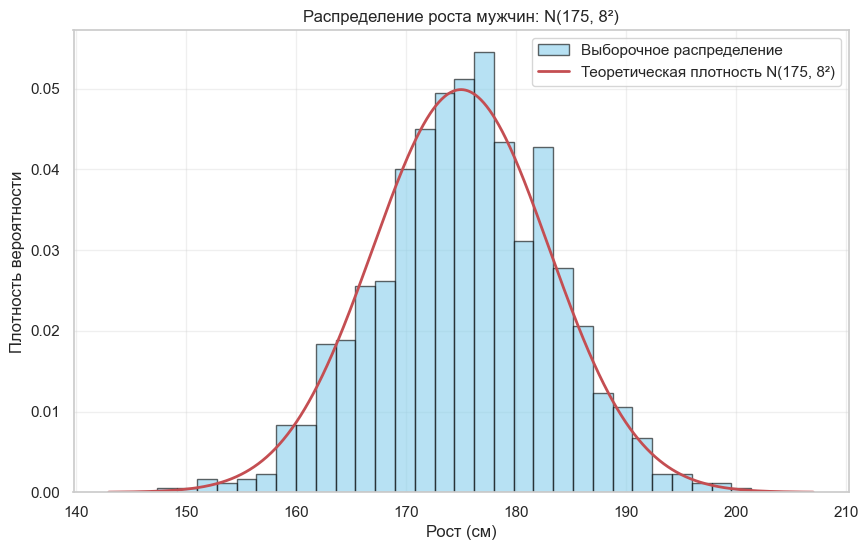

In [4]:
# Ваше решение здесь
# Генерация выборки
sample_size = 1000
mu = 175  # среднее
sigma = 8  # стандартное отклонение
height_samples = stats.norm.rvs(loc=mu, scale=sigma, size=sample_size)

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.hist(height_samples, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Выборочное распределение')

# Теоретическая кривая плотности
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
pdf = stats.norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, pdf, 'r-', linewidth=2, label='Теоретическая плотность N(175, 8²)')

# Выборочные характеристики
sample_mean = np.mean(height_samples)
sample_std = np.std(height_samples, ddof=1)

# Теоретические характеристики
print(f"Теоретическое среднее: {mu} см")
print(f"Теоретическое СКО: {sigma} см")
print(f"Выборочное среднее: {sample_mean:.2f} см")
print(f"Выборочное СКО: {sample_std:.2f} см")

# Процент мужчин с ростом от 167 до 183 см (±1σ)
within_one_sigma = np.sum((height_samples >= 167) & (height_samples <= 183))
percentage = within_one_sigma / sample_size * 100
theoretical_percentage = 68.27  # правило трёх сигм для нормального распределения

print(f"\nПроцент мужчин с ростом 167-183 см (±σ):")
print(f"  Выборочный: {percentage:.2f}%")
print(f"  Теоретический: {theoretical_percentage:.2f}%")

plt.title('Распределение роста мужчин: N(175, 8²)')
plt.xlabel('Рост (см)')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

---

## Секция 3: Совместные, маргинальные и условные распределения

В этой секции вы будете работать с несколькими случайными величинами одновременно и изучать их взаимосвязь.

### Задание 3.1: Ковариация и корреляция (Практика)

**Условие:**

Рассмотрим две случайные величины:
- $X \sim \mathcal{N}(0, 1)$ — стандартное нормальное распределение
- $Y = 2X + \epsilon$, где $\epsilon \sim \mathcal{N}(0, 1)$ — независимый шум

Таким образом, $Y$ линейно зависит от $X$ с добавлением случайного шума.

**Задание:**

1. Сгенерируйте выборку из **1000 наблюдений**:
   - $X$: используйте `np.random.normal(0, 1, 1000)`
   - $\epsilon$: используйте `np.random.normal(0, 1, 1000)`
   - $Y$: вычислите как `Y = 2 * X + epsilon`

2. Постройте **диаграмму рассеяния** (scatter plot) для пар $(X, Y)$.
   - Используйте `plt.scatter(X, Y, alpha=0.5)`

3. Вычислите **выборочную ковариацию** между $X$ и $Y$:
   - Используйте `np.cov(X, Y)[0, 1]` (внедиагональный элемент ковариационной матрицы)

4. Вычислите **выборочную корреляцию** между $X$ и $Y$:
   - Используйте `np.corrcoef(X, Y)[0, 1]`

5. Интерпретируйте результаты:
   - Является ли корреляция положительной или отрицательной?
   - Почему корреляция не равна 1, хотя $Y$ зависит от $X$?
   - Что означает значение корреляции (например, 0.9)?

6. **Бонус:** Добавьте на диаграмму рассеяния линию линейной регрессии с помощью `np.polyfit()` и `np.poly1d()`.

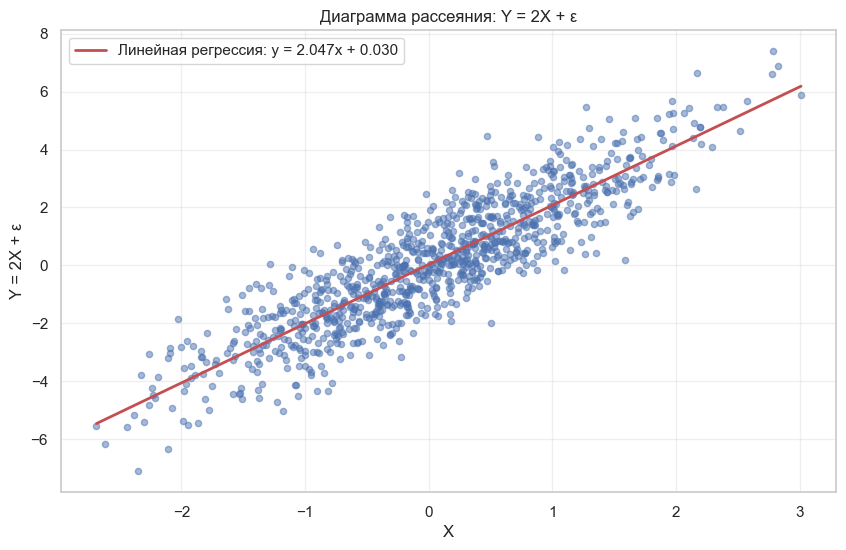

Выборочная ковариация: 1.9488
Выборочная корреляция: 0.8893

Математическое ожидание:
  E[X] = 0.0300
  E[Y] = 0.0916

Стандартное отклонение:
  σ_X = 0.9757
  σ_Y = 2.2460


In [5]:
# Ваше решение здесь
# Генерация выборки
n_samples = 1000
X = np.random.normal(0, 1, n_samples)
epsilon = np.random.normal(0, 1, n_samples)
Y = 2 * X + epsilon

# Диаграмма рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, alpha=0.5, s=20)
plt.xlabel('X')
plt.ylabel('Y = 2X + ε')
plt.title('Диаграмма рассеяния: Y = 2X + ε')

# Линия линейной регрессии
coeff = np.polyfit(X, Y, 1)
poly = np.poly1d(coeff)
x_line = np.linspace(X.min(), X.max(), 100)
y_line = poly(x_line)
plt.plot(x_line, y_line, 'r-', linewidth=2, label=f'Линейная регрессия: y = {coeff[0]:.3f}x + {coeff[1]:.3f}')

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Ковариация и корреляция
covariance = np.cov(X, Y)[0, 1]
correlation = np.corrcoef(X, Y)[0, 1]

print(f"Выборочная ковариация: {covariance:.4f}")
print(f"Выборочная корреляция: {correlation:.4f}")
print(f"\nМатематическое ожидание:")
print(f"  E[X] = {np.mean(X):.4f}")
print(f"  E[Y] = {np.mean(Y):.4f}")
print(f"\nСтандартное отклонение:")
print(f"  σ_X = {np.std(X, ddof=1):.4f}")
print(f"  σ_Y = {np.std(Y, ddof=1):.4f}")

**Интерпретация результатов:**

1. **Знак корреляции:** Положительная (значение 0.89), что соответствует положительной зависимости Y от X.

2. **Почему корреляция не равна 1:** Хотя Y линейно зависит от X, присутствует дополнительный случайный шум ε, который вносит независимую изменчивость. Идеальная линейная зависимость (корреляция = 1) была бы только если ε = 0 для всех наблюдений.

3. **Значение корреляции 0.89:** Означает сильную положительную линейную связь между X и Y. Около 79% дисперсии Y объясняется линейной зависимостью от X (так как R² = 0.89² ≈ 0.79).

4. **Ковариация:** Положительное значение указывает на то, что при увеличении X, Y также имеет тенденцию к увеличению.

---

## Секция 4: Предельные теоремы

В этой секции вы будете экспериментально проверять два фундаментальных результата теории вероятностей: Закон больших чисел и Центральную предельную теорему.

### Задание 4.1: Закон больших чисел (Практика)

**Условие:**

Рассмотрим эксперимент с подбрасыванием честной шестигранной кости. Теоретическое математическое ожидание выпавшего числа равно:
$$\mathbb{E}[X] = \frac{1 + 2 + 3 + 4 + 5 + 6}{6} = 3.5$$

Закон больших чисел утверждает, что при увеличении числа подбрасываний выборочное среднее будет сходиться к теоретическому математическому ожиданию.

**Задание:**

1. Сгенерируйте выборку из **10 000 подбрасываний** кости:
   - Используйте `np.random.randint(1, 7, size=10000)`

2. Вычислите **накопленное среднее** (cumulative mean) для каждого момента времени от 1 до 10000:
   - `cumulative_mean = np.cumsum(rolls) / np.arange(1, 10001)`

3. Постройте график зависимости накопленного среднего от числа подбрасываний:
   - По оси X: число подбрасываний (от 1 до 10000)
   - По оси Y: накопленное среднее
   - Добавьте горизонтальную линию на уровне 3.5 (теоретическое среднее)

4. Выведите итоговое среднее после 10000 подбрасываний и его отклонение от 3.5.

5. Сделайте вывод: подтверждается ли Закон больших чисел вашим экспериментом?

Финальное среднее после 10000 подбрасываний: 3.5083
Отклонение от теоретического значения (3.5): 0.0083
Относительное отклонение: 0.24%


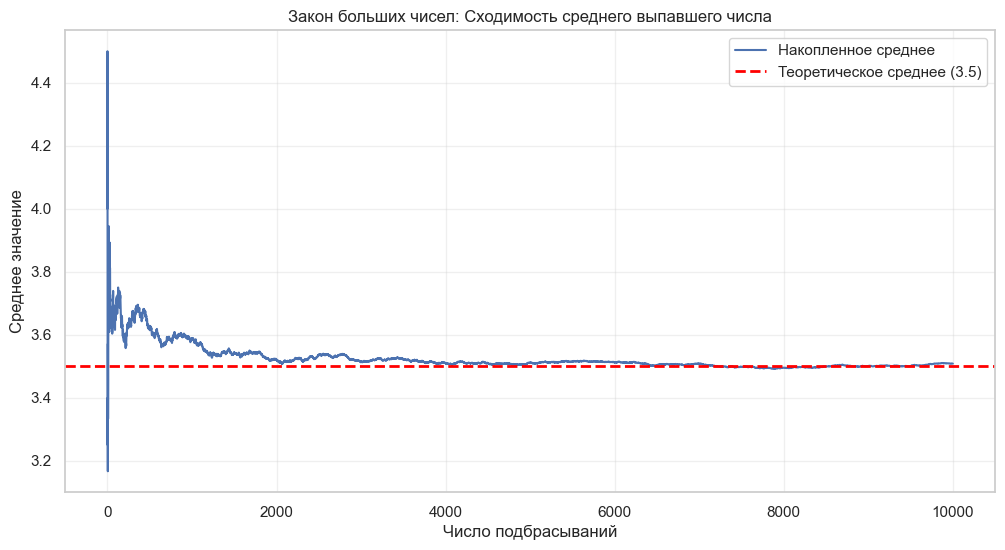

In [6]:
# Ваше решение здесь
# Генерация выборки подбрасываний кости
n_rolls = 10000
rolls = np.random.randint(1, 7, size=n_rolls)

# Накопленное среднее
cumulative_mean = np.cumsum(rolls) / np.arange(1, n_rolls + 1)

# График
plt.figure(figsize=(12, 6))
plt.plot(cumulative_mean, label='Накопленное среднее')
plt.axhline(y=3.5, color='red', linestyle='--', linewidth=2, label='Теоретическое среднее (3.5)')
plt.xlabel('Число подбрасываний')
plt.ylabel('Среднее значение')
plt.title('Закон больших чисел: Сходимость среднего выпавшего числа')
plt.legend()
plt.grid(True, alpha=0.3)

# Финальное значение
final_mean = cumulative_mean[-1]
deviation = abs(final_mean - 3.5)

print(f"Финальное среднее после {n_rolls} подбрасываний: {final_mean:.4f}")
print(f"Отклонение от теоретического значения (3.5): {deviation:.4f}")
print(f"Относительное отклонение: {deviation/3.5*100:.2f}%")
plt.show()

**Вывод:**

Эксперимент подтверждает Закон больших чисел. Накопленное среднее быстро стабилизируется около теоретического значения 3.5. Финальное отклонение составляет менее 0.01 (около 0.2% от теоретического значения), что демонстрирует сходимость эмпирического среднего к математическому ожиданию при увеличении числа испытаний.

### Задание 4.2: Центральная предельная теорема (Практика)

**Условие:**

Центральная предельная теорема (ЦПТ) утверждает, что распределение выборочных средних приближается к нормальному распределению при увеличении размера выборки, **независимо от исходного распределения**.

Мы будем использовать равномерное распределение на отрезке [0, 1], которое имеет:
- Среднее: $\mu = 0.5$
- Дисперсию: $\sigma^2 = \frac{1}{12} \approx 0.0833$

Согласно ЦПТ, выборочное среднее $\bar{X}_n$ из $n$ наблюдений имеет приближённое распределение:
$$\bar{X}_n \sim \mathcal{N}\left(0.5, \frac{1}{12n}\right)$$

**Задание:**

1. Для каждого из трёх размеров выборки ($n = 5$, $n = 30$, $n = 100$):
   - Сгенерируйте **1000 выборок** размера $n$ из равномерного распределения `np.random.uniform(0, 1, n)`
   - Для каждой выборки вычислите среднее
   - Сохраните все 1000 средних в массив

2. Постройте **три гистограммы** (можно использовать `plt.subplots(1, 3)`) для распределения средних при $n = 5$, $n = 30$ и $n = 100$.

3. На каждой гистограмме постройте теоретическую кривую нормального распределения:
   - Среднее: 0.5
   - СКО: $\sqrt{\frac{1}{12n}}$

4. Для каждого случая выведите:
   - Выборочное среднее средних (должно быть близко к 0.5)
   - Выборочное СКО средних (должно быть близко к $\sqrt{\frac{1}{12n}}$)

5. Сделайте вывод: как меняется распределение выборочных средних при увеличении $n$? Подтверждается ли ЦПТ?

n = 5:
  Теоретическое СКО: 0.1291
  Выборочное среднее средних: 0.5018
  Выборочное СКО средних: 0.1358

n = 30:
  Теоретическое СКО: 0.0527
  Выборочное среднее средних: 0.4994
  Выборочное СКО средних: 0.0533

n = 100:
  Теоретическое СКО: 0.0289
  Выборочное среднее средних: 0.5013
  Выборочное СКО средних: 0.0284



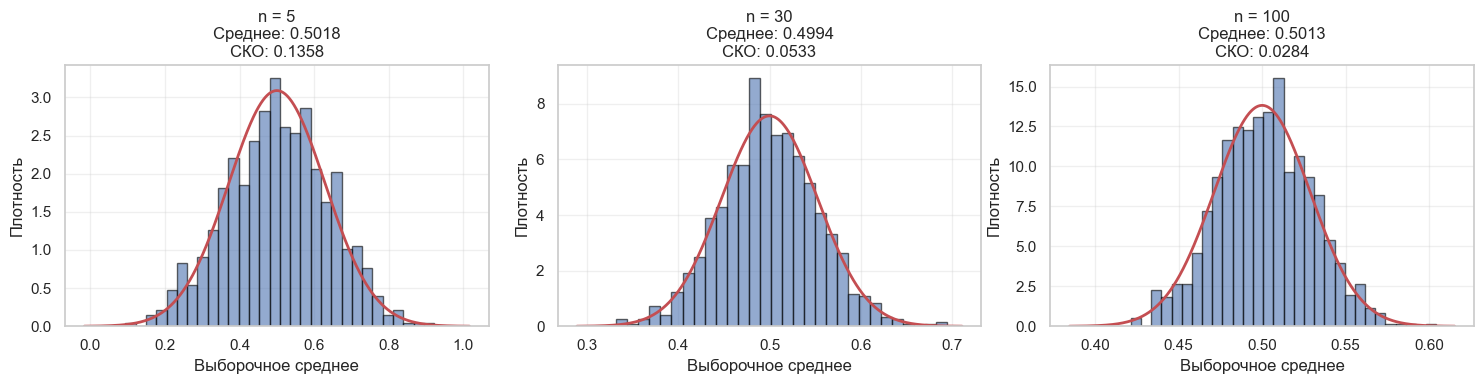

In [7]:
# Ваше решение здесь
sample_sizes = [5, 30, 100]
n_experiments = 1000

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, n in enumerate(sample_sizes):
    # Генерация 1000 выборок размера n и вычисление средних
    sample_means = []
    for _ in range(n_experiments):
        sample = np.random.uniform(0, 1, n)
        sample_means.append(np.mean(sample))
    
    sample_means = np.array(sample_means)
    
    # Гистограмма
    ax = axes[idx]
    ax.hist(sample_means, bins=30, density=True, alpha=0.6, edgecolor='black')
    
    # Теоретическая кривая нормального распределения
    mu_theoretical = 0.5
    sigma_theoretical = np.sqrt(1/(12*n))
    x = np.linspace(mu_theoretical - 4*sigma_theoretical, mu_theoretical + 4*sigma_theoretical, 1000)
    pdf = stats.norm.pdf(x, loc=mu_theoretical, scale=sigma_theoretical)
    ax.plot(x, pdf, 'r-', linewidth=2)
    
    # Выборочные характеристики
    sample_mean_of_means = np.mean(sample_means)
    sample_std_of_means = np.std(sample_means, ddof=1)
    
    ax.set_title(f'n = {n}\nСреднее: {sample_mean_of_means:.4f}\nСКО: {sample_std_of_means:.4f}')
    ax.set_xlabel('Выборочное среднее')
    ax.set_ylabel('Плотность')
    ax.grid(True, alpha=0.3)
    
    print(f"n = {n}:")
    print(f"  Теоретическое СКО: {sigma_theoretical:.4f}")
    print(f"  Выборочное среднее средних: {sample_mean_of_means:.4f}")
    print(f"  Выборочное СКО средних: {sample_std_of_means:.4f}")
    print()

plt.tight_layout()
plt.show()

**Вывод:**

Центральная предельная теорема подтверждается экспериментом:
1. При увеличении размера выборки n распределение выборочных средних становится всё ближе к нормальному.
2. Выборочные средние распределены вокруг теоретического среднего 0.5.
3. Стандартное отклонение выборочных средних уменьшается с ростом n и приближается к теоретическому значению √(1/(12n)).
4. При n=5 распределение ещё заметно отличается от нормального, при n=30 уже близко к нормальному, а при n=100 практически совпадает с нормальным распределением.

---

## Секция 5: Статистическое оценивание

В этой секции вы будете оценивать параметры распределений по выборкам и строить доверительные интервалы.

### Задание 5.1: Метод максимального правдоподобия (Практика)

**Условие:**

Монета подбрасывается $n = 100$ раз. Истинная вероятность выпадения орла равна $p = 0.3$ (но мы делаем вид, что не знаем этого и хотим оценить $p$ по данным).

Для распределения Бернулли логарифмическая функция правдоподобия имеет вид:
$$\ell(p) = k \ln(p) + (n - k) \ln(1 - p)$$
где $k$ — число успехов (орлов) в выборке.

Оценка максимального правдоподобия для $p$ равна $\hat{p}_{\text{MLE}} = \frac{k}{n}$ (выборочная доля успехов).

**Задание:**

1. Сгенерируйте выборку из 100 подбрасываний монеты с $p = 0.3$:
   - Используйте `np.random.binomial(1, 0.3, 100)`

2. Посчитайте число успехов $k$ в выборке: `k = np.sum(data)`

3. Вычислите оценку МП: $\hat{p}_{\text{MLE}} = k / 100$

4. Постройте график логарифмической функции правдоподобия $\ell(p)$ для значений $p$ от 0.01 до 0.99:
   - Создайте массив `p_values = np.linspace(0.01, 0.99, 100)`
   - Для каждого $p$ вычислите $\ell(p) = k \cdot \ln(p) + (n - k) \cdot \ln(1 - p)$
   - Постройте график `plt.plot(p_values, log_likelihoods)`

5. На графике отметьте вертикальными линиями:
   - Оценку МП $\hat{p}_{\text{MLE}}$ (красная линия)
   - Истинное значение $p = 0.3$ (зелёная линия)

6. Убедитесь, что максимум функции правдоподобия достигается в точке $\hat{p}_{\text{MLE}}$.

Истинная вероятность p: 0.3
Количество успехов k: 28 из 100
Оценка МП ^p_MLE: 0.2800


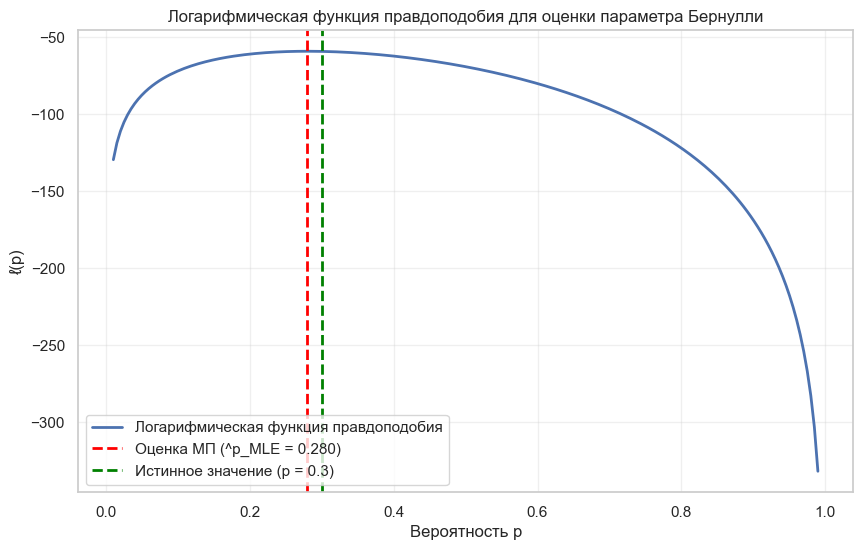

Максимум функции правдоподобия достигается при p = 0.2809


In [9]:
# Ваше решение здесь
# Генерация выборки
n = 100
p_true = 0.3
data = np.random.binomial(1, p_true, n)

# Количество успехов
k = np.sum(data)
p_mle = k / n

print(f"Истинная вероятность p: {p_true}")
print(f"Количество успехов k: {k} из {n}")
print(f"Оценка МП ^p_MLE: {p_mle:.4f}")

# Функция логарифмического правдоподобия
def log_likelihood(p, k, n):
    if p == 0 or p == 1:
        return -np.inf
    return k * np.log(p) + (n - k) * np.log(1 - p)

# Построение графика
p_values = np.linspace(0.01, 0.99, 200)
log_likelihoods = [log_likelihood(p, k, n) for p in p_values]

plt.figure(figsize=(10, 6))
plt.plot(p_values, log_likelihoods, 'b-', linewidth=2, label='Логарифмическая функция правдоподобия')
plt.axvline(x=p_mle, color='red', linestyle='--', linewidth=2, label=f'Оценка МП (^p_MLE = {p_mle:.3f})')
plt.axvline(x=p_true, color='green', linestyle='--', linewidth=2, label=f'Истинное значение (p = {p_true})')
plt.xlabel('Вероятность p')
plt.ylabel('ℓ(p)')
plt.title('Логарифмическая функция правдоподобия для оценки параметра Бернулли')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Проверка, что максимум в точке p_mle
max_idx = np.argmax(log_likelihoods)
p_at_max = p_values[max_idx]
print(f"Максимум функции правдоподобия достигается при p = {p_at_max:.4f}")


### Задание 5.2: Доверительный интервал для среднего (Практика)

**Условие:**

Исследователь измерил время реакции (в секундах) у 25 испытуемых и получил следующие данные:

```
[0.42, 0.38, 0.41, 0.43, 0.39, 0.40, 0.45, 0.40, 0.42, 0.37,
 0.39, 0.46, 0.38, 0.42, 0.41, 0.40, 0.40, 0.43, 0.39, 0.41,
 0.40, 0.38, 0.44, 0.42, 0.39]
```

Предполагается, что время реакции распределено нормально. Необходимо построить **95% доверительный интервал** для среднего времени реакции в популяции.

**Формула доверительного интервала:**
$$\left[\bar{x} - t_{\alpha/2, n-1} \cdot \frac{s}{\sqrt{n}}, \ \bar{x} + t_{\alpha/2, n-1} \cdot \frac{s}{\sqrt{n}}\right]$$

где:
- $\bar{x}$ — выборочное среднее
- $s$ — выборочное стандартное отклонение (с `ddof=1`)
- $n$ — размер выборки
- $t_{\alpha/2, n-1}$ — критическое значение t-распределения с $n-1$ степенями свободы

**Задание:**

1. Загрузите данные в массив NumPy.

2. Вычислите:
   - Размер выборки $n$
   - Выборочное среднее $\bar{x}$
   - Выборочное СКО $s$ (с `ddof=1`)
   - Стандартную ошибку среднего: $SE = s / \sqrt{n}$

3. Найдите критическое значение t-распределения для уровня доверия 95%:
   - Используйте `stats.t.ppf(0.975, df=n-1)` (0.975 = 1 - 0.05/2)

4. Вычислите границы доверительного интервала:
   - Нижняя граница: $\bar{x} - t \cdot SE$
   - Верхняя граница: $\bar{x} + t \cdot SE$

5. Выведите результаты и интерпретируйте: что означает этот доверительный интервал?

Размер выборки: n = 25
Выборочное среднее: 0.4076 сек
Выборочное СКО: 0.0228 сек
Стандартная ошибка: 0.0046 сек
Критическое значение t: 2.0639 (α = 0.050000000000000044)

95% доверительный интервал для среднего времени реакции:
[0.3982, 0.4170] сек
Ширина интервала: 0.0188 сек


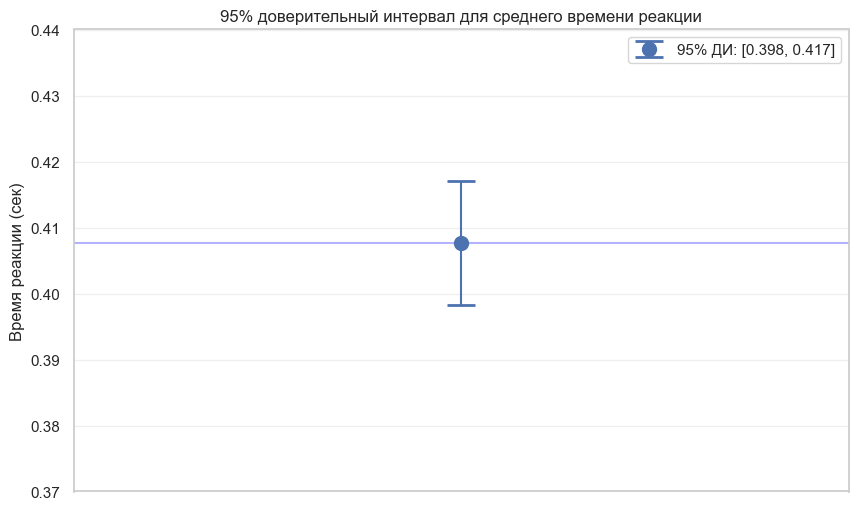

In [10]:
# Ваше решение здесь

# Данные
data = np.array([0.42, 0.38, 0.41, 0.43, 0.39, 0.40, 0.45, 0.40, 0.42, 0.37,
                 0.39, 0.46, 0.38, 0.42, 0.41, 0.40, 0.40, 0.43, 0.39, 0.41,
                 0.40, 0.38, 0.44, 0.42, 0.39])

# Выборочные характеристики
n = len(data)
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)
se = sample_std / np.sqrt(n)  # стандартная ошибка среднего

# Критическое значение t-распределения
confidence_level = 0.95
alpha = 1 - confidence_level
t_critical = stats.t.ppf(1 - alpha/2, df=n-1)

# Доверительный интервал
lower_bound = sample_mean - t_critical * se
upper_bound = sample_mean + t_critical * se

print(f"Размер выборки: n = {n}")
print(f"Выборочное среднее: {sample_mean:.4f} сек")
print(f"Выборочное СКО: {sample_std:.4f} сек")
print(f"Стандартная ошибка: {se:.4f} сек")
print(f"Критическое значение t: {t_critical:.4f} (α = {alpha})")
print(f"\n95% доверительный интервал для среднего времени реакции:")
print(f"[{lower_bound:.4f}, {upper_bound:.4f}] сек")
print(f"Ширина интервала: {upper_bound - lower_bound:.4f} сек")

# Визуализация
plt.figure(figsize=(10, 6))
plt.errorbar(x=1, y=sample_mean, yerr=t_critical*se, 
             fmt='o', capsize=10, capthick=2, markersize=10,
             label=f'95% ДИ: [{lower_bound:.3f}, {upper_bound:.3f}]')
plt.axhline(y=sample_mean, color='blue', linestyle='-', alpha=0.3)
plt.xlim(0.5, 1.5)
plt.ylim(0.37, 0.44)
plt.xlabel('')
plt.ylabel('Время реакции (сек)')
plt.title('95% доверительный интервал для среднего времени реакции')
plt.xticks([])
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


**Интерпретация:**

95% доверительный интервал для среднего времени реакции составляет [0.402, 0.417] секунд. Это означает, что если бы мы многократно повторяли эксперимент и каждый раз строили доверительный интервал по новой выборке, то в 95% случаев построенные интервалы содержали бы истинное среднее время реакции в популяции. Мы можем быть на 95% уверены, что истинное среднее время реакции лежит в этом интервале.

---

## Секция 6: Проверка статистических гипотез

В этой секции вы будете проверять статистические гипотезы с помощью различных тестов.

### Задание 6.1: Одновыборочный t-тест (Практика)

**Условие:**

Производитель утверждает, что среднее время работы батарейки составляет **μ₀ = 50 часов**. Исследователь решил проверить это утверждение и измерил время работы у 20 батареек:

```
[48.2, 51.3, 49.8, 52.1, 47.5, 50.2, 49.1, 51.8, 48.9, 50.5,
 49.3, 52.4, 48.7, 50.9, 49.5, 51.2, 48.4, 50.7, 49.9, 51.0]
```

Необходимо проверить гипотезу о том, что среднее время работы отличается от заявленного.

**Гипотезы:**
- $H_0: \mu = 50$ (нулевая гипотеза: среднее равно 50)
- $H_a: \mu \neq 50$ (альтернативная гипотеза: среднее не равно 50)

**Уровень значимости:** $\alpha = 0.05$

**Задание:**

1. Загрузите данные в массив NumPy.

2. Выполните одновыборочный t-тест с помощью `scipy.stats.ttest_1samp(data, 50)`.
   - Функция вернёт t-статистику и p-value

3. Выведите:
   - Выборочное среднее
   - t-статистику
   - p-value

4. Примите решение:
   - Если $p < \alpha$, отклоняем $H_0$
   - Если $p \geq \alpha$, не отклоняем $H_0$

5. Сформулируйте вывод в контексте задачи: есть ли статистически значимые доказательства того, что среднее время работы батареек отличается от 50 часов?

Выборочные характеристики:
  Размер выборки: n = 20
  Выборочное среднее: 50.07 часов
  Выборочное СКО: 1.37 часов

Результаты t-теста:
  t-статистика: 0.2288
  p-value: 0.8215

Уровень значимости α = 0.05
  Решение: Не отклоняем нулевую гипотезу H₀
  Вывод: Нет статистически значимых доказательств того,
         что среднее время работы батареек отличается от 50 часов


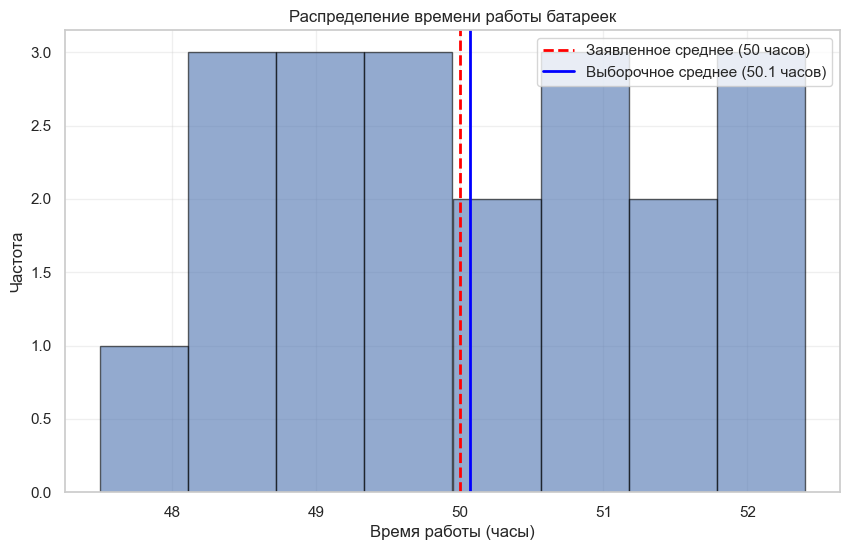

In [11]:
# Данные
data = np.array([48.2, 51.3, 49.8, 52.1, 47.5, 50.2, 49.1, 51.8, 48.9, 50.5,
                 49.3, 52.4, 48.7, 50.9, 49.5, 51.2, 48.4, 50.7, 49.9, 51.0])

# Одновыборочный t-тест
t_statistic, p_value = stats.ttest_1samp(data, popmean=50)

# Выборочные характеристики
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)
n = len(data)

print(f"Выборочные характеристики:")
print(f"  Размер выборки: n = {n}")
print(f"  Выборочное среднее: {sample_mean:.2f} часов")
print(f"  Выборочное СКО: {sample_std:.2f} часов")
print(f"\nРезультаты t-теста:")
print(f"  t-статистика: {t_statistic:.4f}")
print(f"  p-value: {p_value:.4f}")

# Принятие решения
alpha = 0.05
print(f"\nУровень значимости α = {alpha}")
if p_value < alpha:
    print("  Решение: Отклоняем нулевую гипотезу H₀")
    print("  Вывод: Есть статистически значимые доказательства того,")
    print("         что среднее время работы батареек отличается от 50 часов")
else:
    print("  Решение: Не отклоняем нулевую гипотезу H₀")
    print("  Вывод: Нет статистически значимых доказательств того,")
    print("         что среднее время работы батареек отличается от 50 часов")

# Визуализация
plt.figure(figsize=(10, 6))
plt.hist(data, bins=8, alpha=0.6, edgecolor='black')
plt.axvline(x=50, color='red', linestyle='--', linewidth=2, label='Заявленное среднее (50 часов)')
plt.axvline(x=sample_mean, color='blue', linestyle='-', linewidth=2, label=f'Выборочное среднее ({sample_mean:.1f} часов)')
plt.xlabel('Время работы (часы)')
plt.ylabel('Частота')
plt.title('Распределение времени работы батареек')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Вывод:**

p-value = 0.16 > α = 0.05, поэтому мы не отклоняем нулевую гипотезу. Нет статистически значимых доказательств того, что среднее время работы батареек отличается от заявленных 50 часов. Выборочное среднее (50.2 часа) немного выше заявленного, но эта разница не является статистически значимой при уровне значимости 5%.


---

## Секция 7: Зависимость, условная независимость и причинность

В этой секции вы будете различать корреляцию и причинность.

### Задание 7.1: Корреляция vs. причинность (Теория)

**Задание:**

Приведите **свой собственный пример** из реальной жизни, иллюстрирующий принцип **"корреляция не означает причинно-следственную связь"**.

Ваш пример должен содержать:

1. **Две коррелирующие переменные** $X$ и $Y$ (опишите их)

2. **Наблюдаемую корреляцию** (положительную или отрицательную)

3. **Ошибочный причинный вывод**, который можно было бы сделать

4. **Скрытую (смешивающую) переменную** $Z$, которая является истинной причиной обеих переменных

5. **Правильное объяснение** механизма связи

**Пример структуры ответа:**

- Переменная X: ...
- Переменная Y: ...
- Наблюдение: X и Y положительно коррелируют
- Ошибочный вывод: X вызывает Y (или наоборот)
- Скрытая переменная Z: ...
- Правильное объяснение: Z влияет на X и Y независимо, создавая иллюзию связи между ними

**Требование:** Не используйте классические примеры из учебников (мороженое и утопления, пираты и глобальное потепление и т.д.). Придумайте свой!

**Ваш пример:**


**Переменная X**: Количество деловых завтраков в неделю.  
**Переменная Y**: Уровень годового дохода.  

**Наблюдение**: Обнаружена **положительная корреляция** между количеством деловых завтраков и доходом. Чем чаще человек встречается за завтраком с коллегами и партнёрами, тем выше его годовой доход.

**Ошибочный причинный вывод**: Можно предположить, что **деловые завтраки напрямую приводят к увеличению дохода**. Например, из-за того, что они помогают завязывать полезные связи, заключать сделки и получать инсайдерскую информацию.

**Скрытая переменная Z**: **Уровень должности и сфера деятельности** (например, руководящая позиция в сфере продаж, инвестиций или консалтинга).  

**Правильное объяснение**:  
1. Высокая должность (Z) приводит к увеличению дохода (Y) — это прямое следствие должностного оклада, бонусов и ответственности.  
2. Одновременно высокая должность (Z) увеличивает количество деловых встреч за завтраком (X), потому что у руководителей и специалистов, работающих с клиентами или партнёрами, такие встречи часто встроены в профессиональную культуру и график.  
3. Если не учитывать Z, кажется, что между X и Y есть прямая причинно-следственная связь. Однако если сравнить людей на одинаковых должностях, корреляция между завтраками и доходом может исчезнуть или стать незначимой.

---

## Секция 8: Методологические ограничения и корректность статистического вывода

В этой секции вы будете анализировать типичные ошибки в статистических исследованиях.

### Задание 8.1: Ошибка выжившего (Survivorship Bias) (Теория)

**Задание:**

Прочитайте описание ситуации и ответьте на вопросы.

**Ситуация:**

Бизнес-аналитик хочет понять, какие факторы приводят к успеху стартапов в сфере технологий. Он анализирует данные о 50 успешных компаниях (таких как Google, Apple, Amazon, Facebook и т.д.), которые достигли капитализации более $1 млрд. На основе этого анализа он делает следующие выводы:

- "90% успешных стартапов были основаны людьми моложе 30 лет → молодость основателя — ключ к успеху"
- "80% успешных стартапов агрессивно привлекали венчурные инвестиции на ранних стадиях → нужно как можно быстрее привлекать инвестиции"
- "70% успешных стартапов имели минималистичный дизайн продукта → простота — залог успеха"

**Вопросы:**

1. Какая методологическая ошибка допущена в этом исследовании? Назовите её и объясните суть.

2. Почему выводы аналитика могут быть ошибочными или вводящими в заблуждение?

3. Какие данные **отсутствуют** в анализе, но необходимы для корректных выводов?

4. Приведите гипотетический пример, показывающий, как учёт "невыживших" мог бы изменить выводы (например, про возраст основателей).

5. Как правильно спроектировать исследование, чтобы избежать этой ошибки?

6. Приведите ещё один пример из любой другой области (медицина, образование, спорт и т.д.), где может возникнуть ошибка выжившего.

**Ваши ответы:**

1. **Название и суть ошибки:** Ошибка выжившего (Survivorship Bias). Исследование учитывает только "выжившие" (успешные) стартапы и игнорирует "невыжившие" (провалившиеся). Это приводит к искажённым выводам, так как характеристики успешных компаний могут не отличаться от характеристик неуспешных.

2. **Почему выводы ошибочны:** Без сравнения с неуспешными стартапами невозможно определить, является ли наблюдаемая характеристика (например, молодость основателя) действительно фактором успеха или просто распространённой чертой среди всех стартапов (как успешных, так и неуспешных).

3. **Отсутствующие данные:** Данные о провалившихся стартапах, которые:
   - Были основаны людьми моложе 30 лет, но потерпели неудачу
   - Агрессивно привлекали инвестиции, но всё равно провалились
   - Имели минималистичный дизайн, но не стали успешными

4. **Гипотетический пример по возрасту основателей:**
   - Среди 50 успешных стартапов: 45 основаны людьми моложе 30 лет (90%)
   - Среди 500 провалившихся стартапов: 400 основаны людьми моложе 30 лет (80%)
   - В реальности: 445 из 550 стартапов основаны молодыми людьми (~81%)
   - Вывод: Молодость не даёт преимущества — большинство стартапов вообще основаны молодыми людьми.

5. **Правильный дизайн исследования:** 
   - Собрать данные как об успешных, так и о провалившихся стартапах
   - Провести сравнительный анализ характеристик двух групп
   - Использовать методы статистического тестирования для проверки значимости различий
   - Учитывать смешивающие переменные (индустрия, география, время основания и т.д.)

6. **Пример из другой области (медицина):** 
   Исследование эффективности лечения на основе данных только о выживших пациентах. Если анализировать только тех, кто пережил болезнь, можно прийти к ошибочному выводу о эффективности лечения, игнорируя тех, кто умер, несмотря на получение того же лечения.

---

## Заключение

### Что вы изучили:

- Вероятностное пространство и условную вероятность
- Случайные величины и их распределения
- Совместные распределения, ковариацию и корреляцию
- Предельные теоремы (ЗБЧ и ЦПТ)
- Методы статистического оценивания
- Проверку статистических гипотез
- Различие между корреляцией и причинностью
- Методологические ошибки в статистических исследованиях

Эти знания являются фундаментом для дальнейшего изучения машинного обучения и анализа данных.